<a href="https://colab.research.google.com/github/aditya-142/tensorflow/blob/main/cnn_eurosat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EUROSAT SATELLITE Project
Dataset contains all the RGB and Bands images from Sentinel-2

**Acknowledgements**

Eurosat: A novel dataset and deep learning benchmark for land use and land cover classification, Helber, Patrick and Bischke, Benjamin and Dengel, Andreas and Borth, Damian, IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 2019, IEEE.

## About Dataset

### Context
This dataset is being used for classifying the use of land in geospatial images. The end goal for the classification is that the top 2 uses of land in an image are given as output to the user.

### Content
This dataset contains images belonging to the EuroSat dataset. There are 2 folders, namely,

EuroSAT → Contains RGB images collected from the Sentinel Dataset.
EuroSATallBands → Contains .tif files which have all the bands of the spectrum as collected from the Sentinel-2 satellite.
Each image is 64x64 pixels with a Ground Sampling Distance of 10m. They were all collected from the Sentinel-2 satellite

The 2 directories containing the following **10 classes** folders :

- AnnualCrop
- Forest
- HerbaceousVegatation
- Highway
- Industrial
- Pasture
- PermanentCrop
- Residential
- River
- SeaLake

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shanks01","key":"a9ee205e45a686d3db591afae2b2d4c0"}'}

In [3]:
!ls -lha kaggle.json

!pip install -q Kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 Jul 29 02:45 kaggle.json


In [4]:
!kaggle datasets download -d nilesh789/eurosat-rgb

 90% 81.0M/89.6M [00:00<00:00, 110MB/s] 
100% 89.6M/89.6M [00:00<00:00, 99.4MB/s]


In [5]:
!unzip eurosat-rgb.zip

Streaming output truncated to the last 5000 lines.
  inflating: 2750/River/River_1449.jpg  
  inflating: 2750/River/River_145.jpg  
  inflating: 2750/River/River_1450.jpg  
  inflating: 2750/River/River_1451.jpg  
  inflating: 2750/River/River_1452.jpg  
  inflating: 2750/River/River_1453.jpg  
  inflating: 2750/River/River_1454.jpg  
  inflating: 2750/River/River_1455.jpg  
  inflating: 2750/River/River_1456.jpg  
  inflating: 2750/River/River_1457.jpg  
  inflating: 2750/River/River_1458.jpg  
  inflating: 2750/River/River_1459.jpg  
  inflating: 2750/River/River_146.jpg  
  inflating: 2750/River/River_1460.jpg  
  inflating: 2750/River/River_1461.jpg  
  inflating: 2750/River/River_1462.jpg  
  inflating: 2750/River/River_1463.jpg  
  inflating: 2750/River/River_1464.jpg  
  inflating: 2750/River/River_1465.jpg  
  inflating: 2750/River/River_1466.jpg  
  inflating: 2750/River/River_1467.jpg  
  inflating: 2750/River/River_1468.jpg  
  inflating: 2750/River/River_1469.jpg  
  inflat

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
import pandas as pd
from sklearn.model_selection import ShuffleSplit

In [7]:
ROOT_dir = "./2750/"
folders = os.listdir(ROOT_dir)

In [8]:
len_of_images = []
for i in folders:
    file_path = os.listdir("{}/{}".format(ROOT_dir,i))
    len_of_images.append(len(file_path))
    print(f"{i}:{len(file_path)} files")

Residential:3000 files
PermanentCrop:2500 files
Pasture:2000 files
SeaLake:3000 files
HerbaceousVegetation:3000 files
AnnualCrop:3000 files
Forest:3000 files
Industrial:2500 files
River:2500 files
Highway:2500 files


In [9]:
sum(len_of_images)

27000

### We have 27000 images

In [10]:
file_path = os.listdir("{}/{}".format(ROOT_dir,"Highway"))

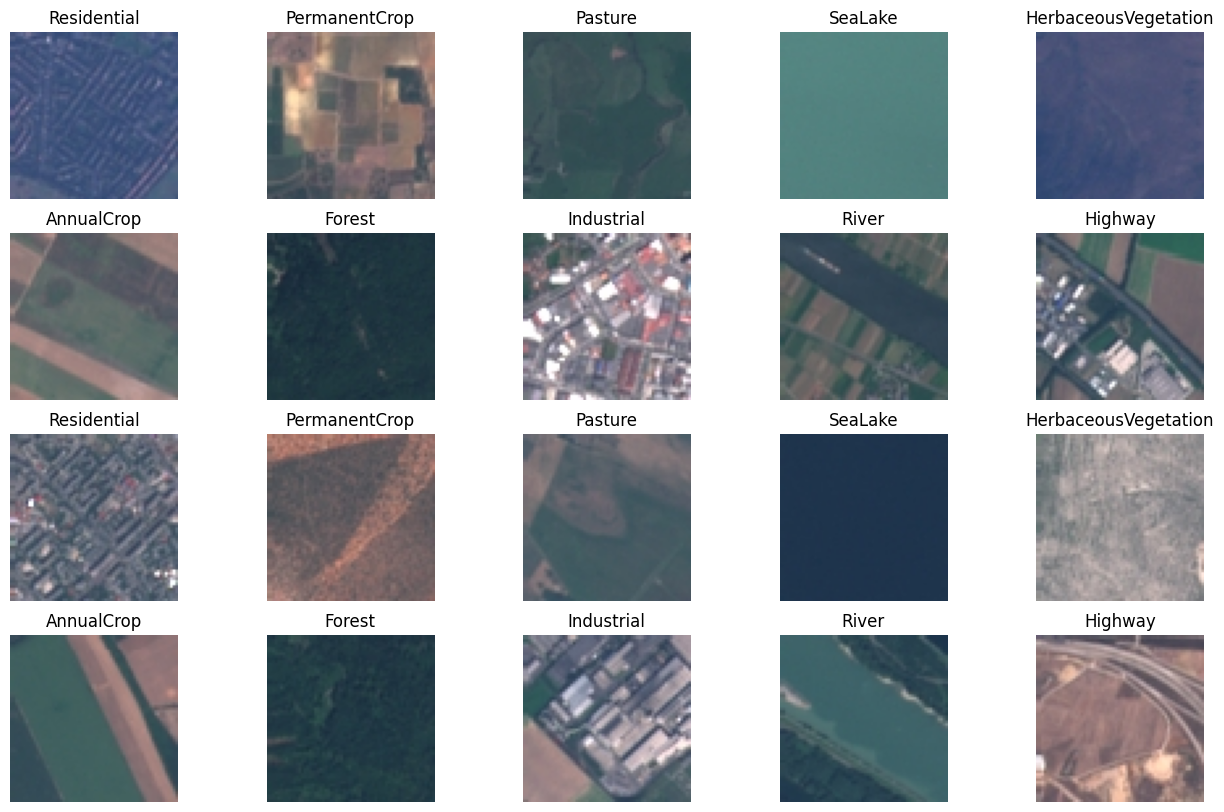

In [11]:
plt.figure(figsize=(16,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    file_path = os.listdir("{}/{}".format(ROOT_dir,folders[i%10]))
    image_ = Image.open(ROOT_dir+folders[i%10]+"/"+file_path[random.randint(1,1500)])
    plt.imshow(image_)
    plt.title(folders[i%10])
    plt.axis("off")

### Create directiories for train & test data

In [12]:
TRAIN_DIR = './training'
TEST_DIR = './testing'

for path in [TRAIN_DIR,TEST_DIR]:
    if not os.path.exists(path):
        os.mkdir(path)

for subfolder in folders:
    if not os.path.exists(os.path.join(TRAIN_DIR,subfolder)):
        os.mkdir(os.path.join(TRAIN_DIR,subfolder))

    if not os.path.exists(os.path.join(TEST_DIR, subfolder)):
        os.mkdir(os.path.join(TEST_DIR, subfolder))

In [13]:
dataset = {}
for value_class in folders:
    for img in os.listdir(ROOT_dir+'/'+value_class):
        dataset.update({os.path.join(ROOT_dir,value_class,img):value_class})

X = pd.Series(dataset.keys())
y = pd.get_dummies(dataset.values())
split = ShuffleSplit(n_splits=1,test_size=0.25,train_size=0.75,random_state=42)

In [14]:
import re
import shutil
from tqdm import tqdm

for train_idx, test_idx in split.split(X, y):
    train_paths = X[train_idx]
    test_paths = X[test_idx]

    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub('./2750', './training', i) for i in train_paths]
    new_test_paths = [re.sub('./2750/', './testing/', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))

    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training', 'testing', i[1])):
                shutil.copy(i[0], i[1])

moving training files..


100%|██████████| 20250/20250 [00:06<00:00, 3229.90it/s]


moving testing files..


100%|██████████| 6750/6750 [00:01<00:00, 5108.00it/s]


# We performed Data split into Training and Testing.

Split data contains:
- 20250: training images
- 6750: testing images

### Data Augementation on training and testing data by ImageDataGenerator

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip,RandomRotation,RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [42]:
IMAGE_SHAPE=(64,64)
train_data = ImageDataGenerator(rescale = 1/255.0,
                              rotation_range=45,
                               zoom_range=0.2,
                               horizontal_flip= True)

In [43]:
training =train_data.flow_from_directory(TRAIN_DIR,
                                           batch_size=32,
                                           target_size =(224,224),
                                           class_mode = "categorical",)

Found 20250 images belonging to 10 classes.


In [47]:
test_aug = ImageDataGenerator(rescale = 1/255.0)
testing=test_aug.flow_from_directory(TEST_DIR,batch_size=32,class_mode="categorical",target_size=(224,224))

Found 6750 images belonging to 10 classes.


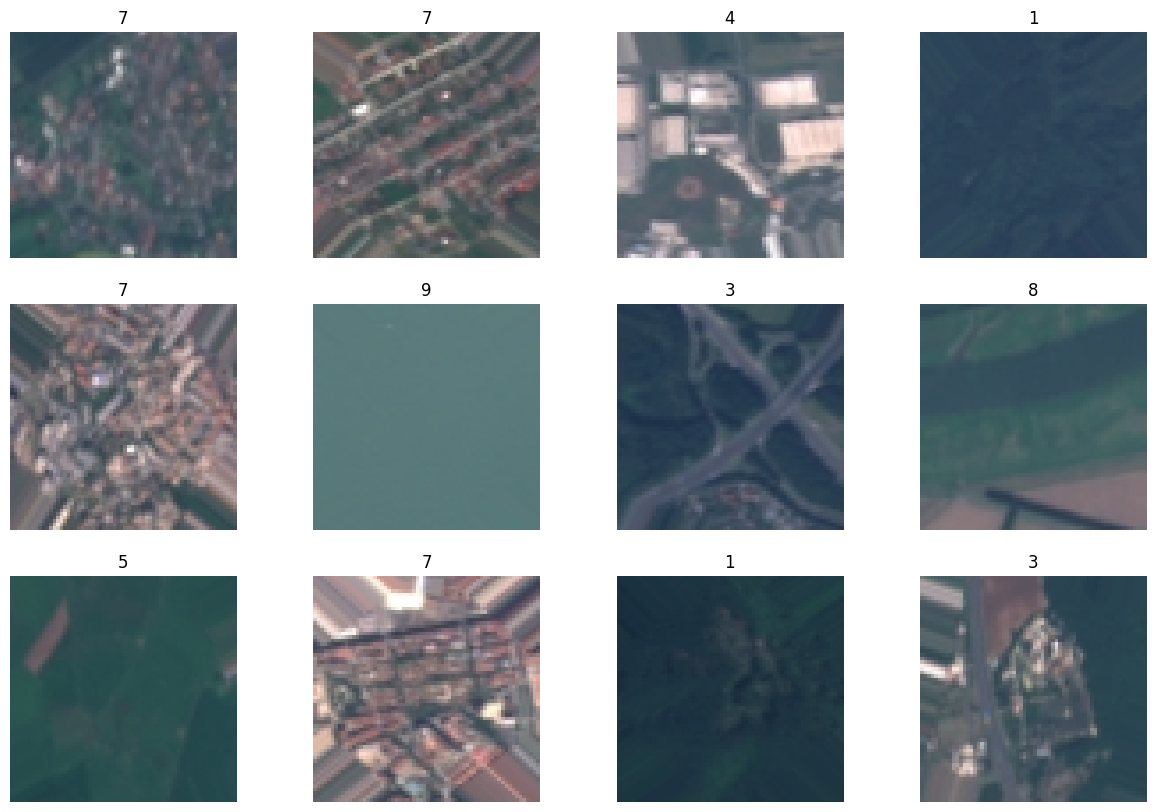

In [21]:
plt.figure(figsize=(15,10))
n = 12
for i in range(n):
    plt.subplot(3,4,i+1)
    validImages,validLabels = training_data[i]
    plt.imshow(validImages[0])
    decodeLabel = np.argmax(validLabels)
    plt.title(decodeLabel)
    plt.axis("off")

###  Building a CNN model using DenseNet 201


In [22]:
import tensorflow.keras as keras
from tensorflow.keras.applications import DenseNet201

In [35]:
densenet=DenseNet201(input_shape=(224,224,3), weights='imagenet',include_top=False,classes=10)

In [36]:
model=keras.models.Sequential()
for i in densenet.layers:
  i.trainable=False
model.add(densenet)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_1   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               983552    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 19,310,666
Trainable params: 988,682
Non-trainable params: 18,321,984
____________________________________

## Testing the model

In [38]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [39]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [48]:
history=model.fit(training,epochs=10,validation_data=testing,callbacks = [early_stopping, model_checkpoint_callback])

Epoch 1/10
633/633 [==============================] - 302s 477ms/step - loss: 0.3356 - accuracy: 0.8841 - val_loss: 0.2347 - val_accuracy: 0.9135
Epoch 2/10
633/633 [==============================] - 300s 474ms/step - loss: 0.3380 - accuracy: 0.8855 - val_loss: 0.2126 - val_accuracy: 0.9276
Epoch 3/10
633/633 [==============================] - 297s 469ms/step - loss: 0.3265 - accuracy: 0.8852 - val_loss: 0.2346 - val_accuracy: 0.9167
Epoch 4/10
633/633 [==============================] - 302s 478ms/step - loss: 0.3224 - accuracy: 0.8865 - val_loss: 0.2193 - val_accuracy: 0.9230
Epoch 5/10
633/633 [==============================] - 290s 457ms/step - loss: 0.3215 - accuracy: 0.8885 - val_loss: 0.2208 - val_accuracy: 0.9233
Epoch 6/10
633/633 [==============================] - 302s 477ms/step - loss: 0.3123 - accuracy: 0.8911 - val_loss: 0.2126 - val_accuracy: 0.9243
Epoch 7/10
633/633 [==============================] - 293s 463ms/step - loss: 0.3143 - accuracy: 0.8895 - val_loss: 0.2273 -

In [31]:
predict = model.predict(testing)

211/211 [==============================] - 10s 29ms/step


In [50]:
import pandas as pd
ne=history.epoch
data=pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,0.335579,0.884148,0.234654,0.913481
1,0.337950,0.885531,0.212619,0.927556
2,0.326487,0.885185,0.234608,0.916741
3,0.322376,0.886469,0.219298,0.922963
4,0.321515,0.888543,0.220770,0.923259
5,0.312307,0.891062,0.212618,0.924296
6,0.314348,0.889481,0.227345,0.918222
7,0.303852,0.891407,0.205060,0.926074
8,0.310741,0.891951,0.217363,0.924444
9,0.304497,0.893383,0.189743,0.934074


import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9189242929301971436, *['loss'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9189242929301971436, *['accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9189242929301971436, *['val_loss'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9189242929301971436, *['val_accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9189242929301971436, *['loss'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9189242929301971436, *['accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9189242929301971436, *['val_loss'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9189242929301971436, *['val_accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9189242929301971436 = autoviz.get_df('df_9189242929301971436')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_9189242929301971436, *[[['loss', 'accuracy'], ['accuracy', 'val_loss'], ['val_loss', 'val_accuracy']]], **{})
chart

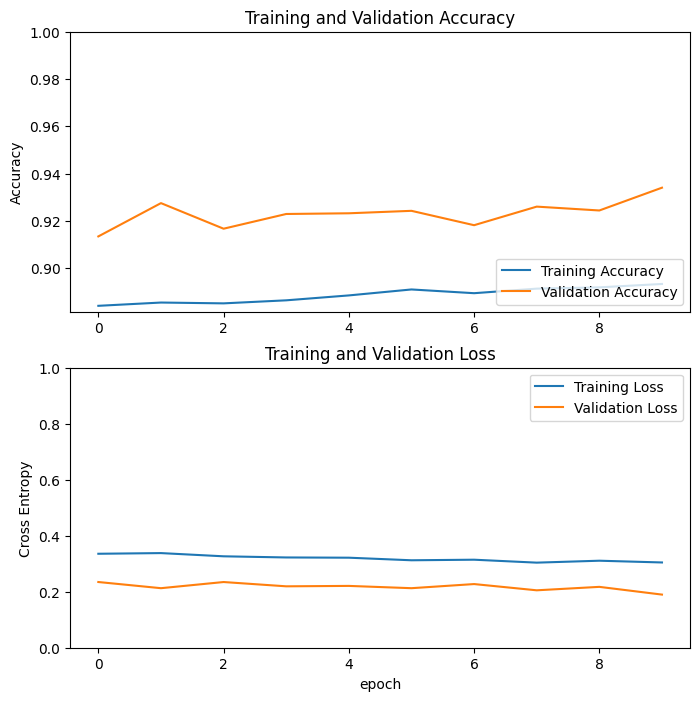

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()